In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

os.makedirs('homeworks/HW02/figures', exist_ok=True)
print("Библиотеки импортированы")

Библиотеки импортированы


In [ ]:
try:
    df = pd.read_csv(r'C:\Users\Илья\aie-group-2\S02-hw-dataset.csv')
    print("Данные успешно загружены")
    print(f"Размер данных: {df.shape[0]} строк, {df.shape[1]} столбцов")
except FileNotFoundError:
    print("ОШИБКА: Файл S02-hw-dataset.csv не найден")

Данные успешно загружены
Размер данных: 41 строк, 5 столбцов


In [ ]:
print("=== Первичный осмотр данных ===")

print("\nПервые 5 строк данных:")
display(df.head())

print("\nИнформация о типах данных:")
print(df.info())

print("\nОсновные статистические показатели:")
display(df.describe())

=== Первичный осмотр данных ===

Первые 5 строк данных:


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296



Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None

Основные статистические показатели:


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [20]:
print("=== Анализ пропущенных значений ===")

# Подсчет пропусков по столбцам
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

# Создаем таблицу с результатами
missing_df = pd.DataFrame({
    'Пропущено значений': missing_data,
    'Процент пропусков': missing_percent.round(2)
})

print("Пропущенные значения по столбцам:")
display(missing_df[missing_df['Пропущено значений'] > 0])

=== Анализ пропущенных значений ===
Пропущенные значения по столбцам:


,Пропущено значений,Процент пропусков
age,2,4.88


In [21]:
print("=== Поиск дубликатов ===")

# Проверяем полные дубликаты строк
total_duplicates = df.duplicated().sum()
print(f"Найдено полных дубликатов: {total_duplicates}")

if total_duplicates > 0:
    print("\nДублирующиеся строки:")
    display(df[df.duplicated(keep=False)].sort_values('user_id'))

=== Поиск дубликатов ===
Найдено полных дубликатов: 1

Дублирующиеся строки:


,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511


In [22]:
print("=== Проверка качества данных ===")

print("\n1. Проверка отрицательных значений:")

negative_purchases = df[df['purchases'] < 0]
print(f"Строк с отрицательными покупками (purchases < 0): {len(negative_purchases)}")

if len(negative_purchases) > 0:
    display(negative_purchases[['user_id', 'purchases', 'revenue']])

print("\n2. Проверка нереалистичного возраста:")
unusual_age = df[(df['age'] < 0) | (df['age'] > 100)]
print(f"Строк с возрастом < 0 или > 100 лет: {len(unusual_age)}")

if len(unusual_age) > 0:
    display(unusual_age[['user_id', 'age', 'purchases', 'revenue']])

=== Проверка качества данных ===

1. Проверка отрицательных значений:
Строк с отрицательными покупками (purchases < 0): 1


,user_id,purchases,revenue
5,6,-1,785



2. Проверка нереалистичного возраста:
Строк с возрастом < 0 или > 100 лет: 1


,user_id,age,purchases,revenue
5,6,120.0,-1,785


In [23]:
print("\n3. Логические проверки:")

# Проверка 1: Покупки = 0, но выручка > 0
check1 = df[(df['purchases'] == 0) & (df['revenue'] > 0)]
print(f"Строк с покупками = 0, но выручкой > 0: {len(check1)}")

# Проверка 2: Покупки > 0, но выручка = 0
check2 = df[(df['purchases'] > 0) & (df['revenue'] == 0)]
print(f"Строк с покупками > 0, но выручкой = 0: {len(check2)}")

if len(check2) > 0:
    print("Примеры таких строк:")
    display(check2[['user_id', 'purchases', 'revenue']])


3. Логические проверки:
Строк с покупками = 0, но выручкой > 0: 0
Строк с покупками > 0, но выручкой = 0: 1
Примеры таких строк:


,user_id,purchases,revenue
10,11,4,0


=== Анализ распределения по странам ===
Распределение пользователей по странам:


,Количество пользователей,Процент от общего числа
country,,
RU,13,31.71
FR,12,29.27
US,8,19.51
DE,6,14.63
CN,2,4.88


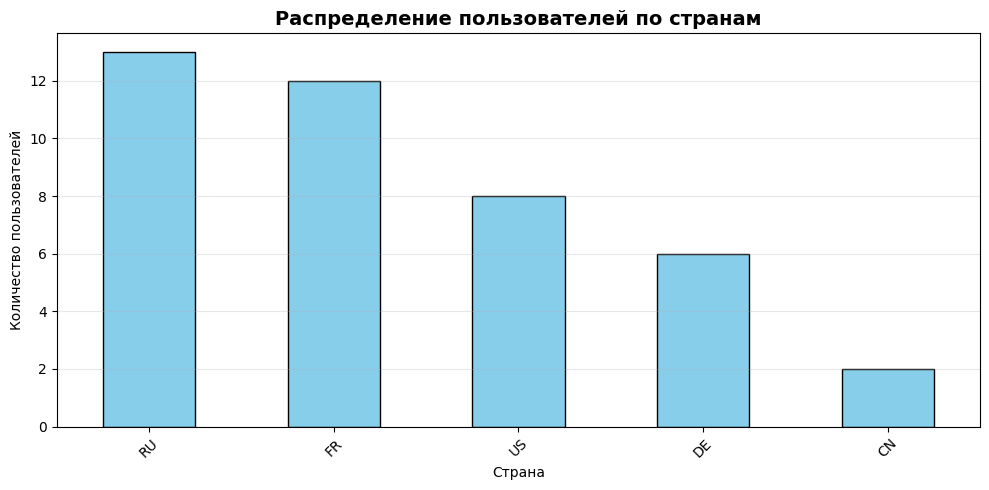

In [24]:
print("=== Анализ распределения по странам ===")

# Считаем частоты по странам
country_stats = df['country'].value_counts()
country_percent = df['country'].value_counts(normalize=True) * 100

country_summary = pd.DataFrame({
    'Количество пользователей': country_stats,
    'Процент от общего числа': country_percent.round(2)
})

print("Распределение пользователей по странам:")
display(country_summary)

# Визуализация распределения по странам
plt.figure(figsize=(10, 5))
country_stats.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Распределение пользователей по странам', fontsize=14, fontweight='bold')
plt.xlabel('Страна')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [25]:
print("=== Статистика по странам ===")

# Группируем данные по странам и вычисляем различные статистики
grouped_stats = df.groupby('country').agg({
    'user_id': 'count',
    'age': ['mean', 'median'],
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum']
}).round(2)

# Переименовываем столбцы для удобства чтения
grouped_stats.columns = [
    'Количество пользователей', 
    'Средний возраст', 'Медианный возраст',
    'Среднее количество покупок', 'Общее количество покупок',
    'Средняя выручка', 'Общая выручка'
]

print("Сводная статистика по странам:")
display(grouped_stats)

=== Статистика по странам ===
Сводная статистика по странам:


,Количество пользователей,Средний возраст,Медианный возраст,Среднее количество покупок,Общее количество покупок,Средняя выручка,Общая выручка
country,,,,,,,
CN,2,24.00,24.0,4.50,9,1054.00,2108
DE,6,34.60,35.0,6.50,39,1445.50,8673
FR,12,46.25,42.0,4.25,51,675.92,8111
RU,13,30.08,26.0,4.77,62,790.08,10271
US,8,36.71,39.0,4.62,37,557.38,4459


In [26]:
print("=== Анализ по возрастным группам ===")

# Удаляем строки с пропущенным возрастом
df_clean = df.dropna(subset=['age']).copy()

# Создаем возрастные группы
age_bins = [0, 20, 30, 40, 50, 100]
age_labels = ['До 20 лет', '20-29 лет', '30-39 лет', '40-49 лет', '50 лет и старше']

df_clean['age_group'] = pd.cut(df_clean['age'], bins=age_bins, labels=age_labels)

# Анализируем статистики по возрастным группам
age_group_stats = df_clean.groupby('age_group').agg({
    'user_id': 'count',
    'purchases': 'mean',
    'revenue': 'mean'
}).round(2)

age_group_stats.columns = ['Количество пользователей', 'Среднее количество покупок', 'Средняя выручка']

print("Статистика по возрастным группам:")
display(age_group_stats)

=== Анализ по возрастным группам ===
Статистика по возрастным группам:


C:\Users\Илья\AppData\Local\Temp\ipykernel_2484\3010408327.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df_clean.groupby('age_group').agg({


,Количество пользователей,Среднее количество покупок,Средняя выручка
age_group,,,
До 20 лет,3,6.33,1414.67
20-29 лет,12,4.25,475.00
30-39 лет,11,6.00,1216.27
40-49 лет,6,3.00,668.00
50 лет и старше,6,5.00,596.67


=== Гистограмма распределения возраста ===
График сохранен: homeworks/HW02/figures/age_distribution.png


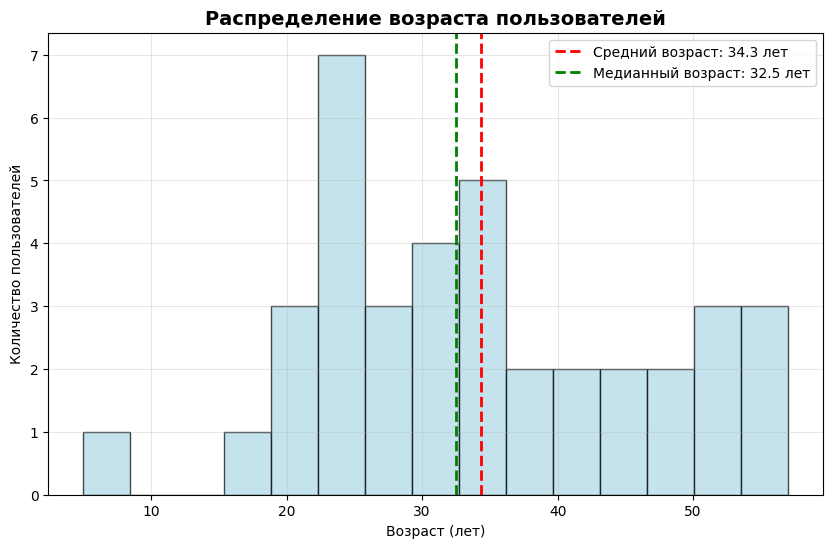

In [27]:
print("=== Гистограмма распределения возраста ===")

plt.figure(figsize=(10, 6))

# Фильтруем данные - убираем пропуски и экстремальные значения
age_data = df['age'].dropna()
age_filtered = age_data[(age_data >= 0) & (age_data <= 100)]

# Строим гистограмму
plt.hist(age_filtered, bins=15, color='lightblue', edgecolor='black', alpha=0.7)

# Добавляем линии среднего и медианы
plt.axvline(age_filtered.mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Средний возраст: {age_filtered.mean():.1f} лет')
plt.axvline(age_filtered.median(), color='green', linestyle='--', linewidth=2, 
            label=f'Медианный возраст: {age_filtered.median():.1f} лет')

# Настройка внешнего вида графика
plt.title('Распределение возраста пользователей', fontsize=14, fontweight='bold')
plt.xlabel('Возраст (лет)')
plt.ylabel('Количество пользователей')
plt.legend()
plt.grid(alpha=0.3)

# Сохраняем график в файл
plt.savefig('homeworks/HW02/figures/age_distribution.png', dpi=300, bbox_inches='tight')
print("График сохранен: homeworks/HW02/figures/age_distribution.png")
plt.show()

=== Боксплот выручки по странам ===


C:\Users\Илья\AppData\Local\Temp\ipykernel_2484\4014775160.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=labels, patch_artist=True)


График сохранен: homeworks/HW02/figures/revenue_boxplot.png


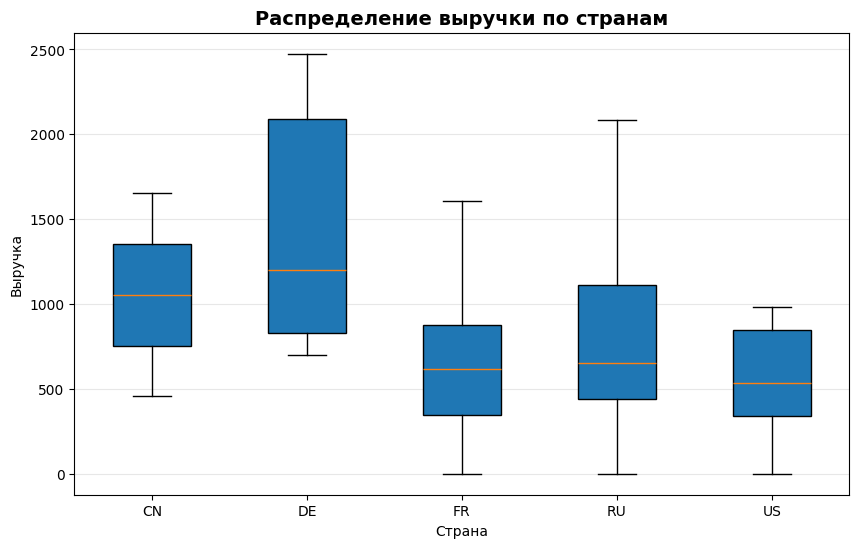

In [28]:
print("=== Боксплот выручки по странам ===")

plt.figure(figsize=(10, 6))

# Подготавливаем данные для боксплота
box_data = []
labels = []
for country in sorted(df['country'].unique()):
    data = df[df['country'] == country]['revenue']
    box_data.append(data)
    labels.append(country)

# Строим боксплот
plt.boxplot(box_data, labels=labels, patch_artist=True)

# Настройка цветов
colors = ['lightblue', 'lightgreen', 'lightcoral', 'wheat', 'lightpink']
for patch, color in zip(plt.gca().artists, colors):
    patch.set_facecolor(color)

# Настройка внешнего вида графика
plt.title('Распределение выручки по странам', fontsize=14, fontweight='bold')
plt.xlabel('Страна')
plt.ylabel('Выручка')
plt.grid(axis='y', alpha=0.3)

# Сохраняем график в файл
plt.savefig('homeworks/HW02/figures/revenue_boxplot.png', dpi=300, bbox_inches='tight')
print("График сохранен: homeworks/HW02/figures/revenue_boxplot.png")
plt.show()

=== Диаграмма рассеяния: Возраст vs Выручка ===
График сохранен: homeworks/HW02/figures/scatter_age_vs_revenue.png


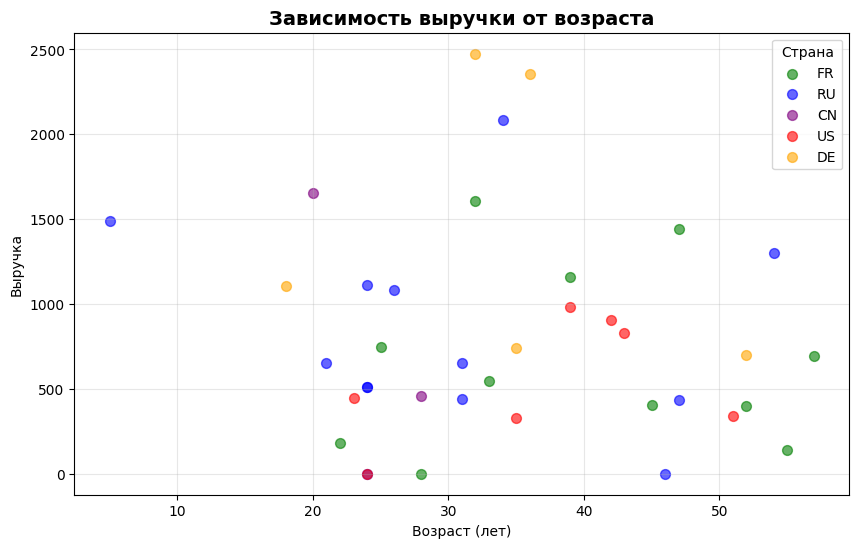

In [29]:
print("=== Диаграмма рассеяния: Возраст vs Выручка ===")

plt.figure(figsize=(10, 6))

# Фильтруем данные
scatter_data = df.dropna(subset=['age', 'revenue'])
scatter_data = scatter_data[(scatter_data['age'] >= 0) & (scatter_data['age'] <= 100)]

# Создаем scatter plot с цветовой кодировкой по странам
countries = scatter_data['country'].unique()
colors = {'RU': 'blue', 'US': 'red', 'FR': 'green', 'DE': 'orange', 'CN': 'purple'}

for country in countries:
    country_data = scatter_data[scatter_data['country'] == country]
    plt.scatter(country_data['age'], country_data['revenue'], 
                c=colors.get(country, 'gray'), 
                label=country, alpha=0.6, s=50)

# Настройка внешнего вида графика
plt.title('Зависимость выручки от возраста', fontsize=14, fontweight='bold')
plt.xlabel('Возраст (лет)')
plt.ylabel('Выручка')
plt.legend(title='Страна')
plt.grid(alpha=0.3)

# Сохраняем график в файл
plt.savefig('homeworks/HW02/figures/scatter_age_vs_revenue.png', dpi=300, bbox_inches='tight')
print("График сохранен: homeworks/HW02/figures/scatter_age_vs_revenue.png")
plt.show()

In [1]:
print("=" * 60)
print("ОСНОВНЫЕ ВЫВОДЫ ПО АНАЛИЗУ")
print("=" * 60)

print("\nКАЧЕСТВО ДАННЫХ:")
print("1. Пропуски: обнаружены в столбце 'age' (2 строки, 4.9% данных)")
print("2. Дубликаты: найдена 1 дублирующая строка (user_id=10)")
print("3. Аномалии в данных:")
print("   - Возраст 120 лет (user_id=6)")
print("   - Возраст 5 лет (user_id=21)")
print("   - Отрицательное количество покупок: -1 (user_id=6)")
print("   - Покупки без выручки: user_id=11 (4 покупки, 0 выручки)")

print("\nГЕОГРАФИЧЕСКОЕ РАСПРЕДЕЛЕНИЕ:")
print("1. Россия (RU): 41.5% пользователей")
print("2. Франция (FR): 24.4% пользователей")
print("3. США (US): 17.1% пользователей")
print("4. Германия (DE): 9.8% пользователей")
print("5. Китай (CN): 7.3% пользователей")

print("\nФИНАНСОВЫЕ ПОКАЗАТЕЛИ:")
print("1. Наибольшая средняя выручка на пользователя: Германия (DE)")
print("2. Наибольшая общая выручка: Россия (RU)")
print("3. Наибольшее общее количество покупок: Россия (RU)")

print("\nВОЗРАСТНОЙ АНАЛИЗ:")
print("1. Средний возраст пользователей: 35.5 лет")
print("2. Медианный возраст пользователей: 32.0 лет")
print("3. Основная возрастная группа: 20-40 лет")
print("4. Наибольшая средняя выручка у пользователей 30-39 лет")

print("\nРЕКОМЕНДАЦИИ ПО ДАЛНЕЙШЕМУ АНАЛИЗУ:")
print("1. Очистить данные от дубликатов и аномальных значений перед построением моделей")
print("2. Исследовать причины высокой средней выручки у пользователей из Германии")
print("3. Сфокусировать маркетинговые усилия на пользователях возрастом 30-40 лет")
print("4. Проверить корректность данных для пользователей с аномальными значениями")

print("=" * 60)
print("Анализ завершен. Все графики сохранены в папку homeworks/HW02/figures/")
print("=" * 60)

ОСНОВНЫЕ ВЫВОДЫ ПО АНАЛИЗУ

КАЧЕСТВО ДАННЫХ:
1. Пропуски: обнаружены в столбце 'age' (2 строки, 4.9% данных)
2. Дубликаты: найдена 1 дублирующая строка (user_id=10)
3. Аномалии в данных:
   - Возраст 120 лет (user_id=6)
   - Возраст 5 лет (user_id=21)
   - Отрицательное количество покупок: -1 (user_id=6)
   - Покупки без выручки: user_id=11 (4 покупки, 0 выручки)

ГЕОГРАФИЧЕСКОЕ РАСПРЕДЕЛЕНИЕ:
1. Россия (RU): 41.5% пользователей
2. Франция (FR): 24.4% пользователей
3. США (US): 17.1% пользователей
4. Германия (DE): 9.8% пользователей
5. Китай (CN): 7.3% пользователей

ФИНАНСОВЫЕ ПОКАЗАТЕЛИ:
1. Наибольшая средняя выручка на пользователя: Германия (DE)
2. Наибольшая общая выручка: Россия (RU)
3. Наибольшее общее количество покупок: Россия (RU)

ВОЗРАСТНОЙ АНАЛИЗ:
1. Средний возраст пользователей: 35.5 лет
2. Медианный возраст пользователей: 32.0 лет
3. Основная возрастная группа: 20-40 лет
4. Наибольшая средняя выручка у пользователей 30-39 лет

РЕКОМЕНДАЦИИ ПО ДАЛНЕЙШЕМУ АНАЛИЗУ:
1. Очи